In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy.random as npr

data = np.genfromtxt('cancer_data.csv', delimiter=',', dtype=np.string_)

In [60]:
real_data = data[1:, :]
#데이터 섞어주기 아주 중요하다!
npr.shuffle(real_data)

In [61]:
data.shape

(101, 3)

In [62]:
x = real_data[:,:2]
y = real_data[:,2]

In [63]:
# 데이터 뽑기
train_x = x[:60]
train_y = y[:60]

test_x = x[60:80]
test_y = y[60:80]

val_x = x[80:]
val_y = y[80:]

In [64]:
train_x = train_x.astype(np.float32)
train_y = train_y.astype(np.float32)

test_x = test_x.astype(np.float32)
test_y = test_y.astype(np.float32)

val_x = val_x.astype(np.float32)
val_y = val_y.astype(np.float32)

In [65]:
print('평균:', 'train_x',train_x.mean())
print('최소값:',train_x.min())
print('최대값:', train_x.max())
print('표준편차:', train_x.std())

평균: train_x 4.435335
최소값: 0.49454185
최대값: 9.670666
표준편차: 2.1230936


In [66]:
train_x_0 = train_x[:, 0]
train_x_0.mean()

4.293546

In [67]:
# 데이터 찾기
indices = np.where(train_x[:,0]>train_x.mean())[0]

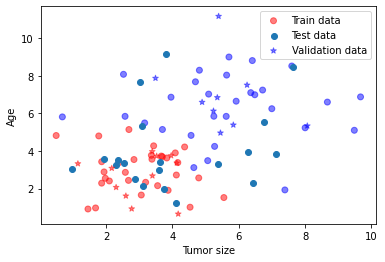

In [68]:
#데이터 시각화

train_colors = ['b' if label == 0 else 'r' for label in train_y]
plt.scatter(train_x[:,0], train_x[:,1], label = 'Train data', alpha = 0.5, 
            marker='o', c = train_colors)

test_colors = ['b' if label == 0 else 'r' for label in test_y]
plt.scatter(test_x[:, 0], test_x[:, 1], label='Test data')

val_colors = ['b' if label == 0 else 'r' for label in val_y]
plt.scatter(val_x[:, 0], val_x[:, 1], label='Validation data', alpha=0.5, 
            marker ='*', c = val_colors)

plt.xlabel('Tumor size')
plt.ylabel('Age')
plt.legend()
plt.show()

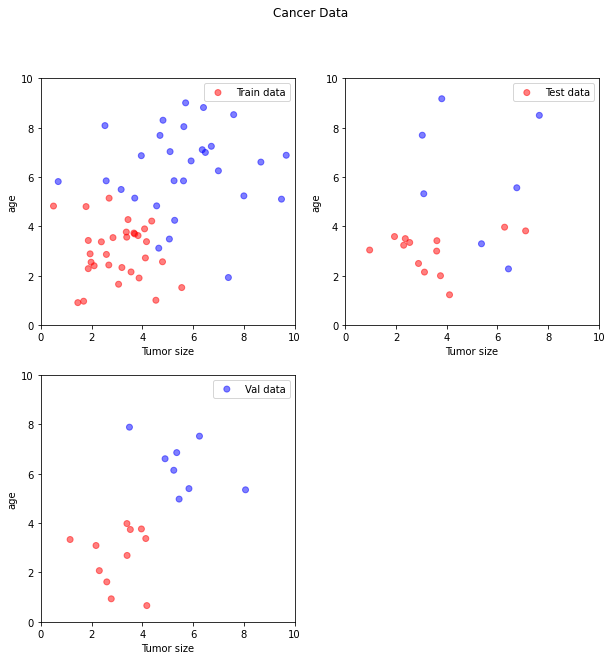

In [69]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
train_x_color = ['b' if label == 0 else 'r' for label in train_y]
ax.scatter(train_x[:,0], train_x[:,1] , label = 'Train data', alpha = 0.5,
           marker = 'o', c = train_x_color)
ax.set_xlabel('Tumor size')
ax.set_ylabel('age')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend()

ax = fig.add_subplot(222)
test_colors = ['b' if label == 0 else 'r' for label in test_y]
ax.scatter(test_x[:,0], test_x[:,1] , label = 'Test data', alpha = 0.5,
           marker = 'o', c = test_colors)
ax.set_xlabel('Tumor size')
ax.set_ylabel('age')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend()

ax = fig.add_subplot(223)
val_colors = ['b' if label == 0 else 'r' for label in val_y]
ax.scatter(val_x[:,0], val_x[:,1] , label = 'Val data', alpha = 0.5,
           marker = 'o', c = val_colors)
ax.set_xlabel('Tumor size')
ax.set_ylabel('age')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend()
fig.suptitle('Cancer Data')
plt.show()

In [70]:
def var_summary(x):
    ret_dict = {}
    if isinstance(x, np.ndarray):
        ret_dict['mean'] = x.mean()
        ret_dict['std'] = x.std()
        ret_dict['min'] = x.min()
        ret_dict['max'] = x.max()
    else:
        raise ValueError
    return ret_dict

train_x_0_summaries = var_summary(train_x[:,0])
train_x_1_summaries = var_summary(train_x[:,1])

test_xs_0_summaries = var_summary(test_x[:,0])
test_xs_1_summaries = var_summary(test_x[:,1])

val_x_0_summaries = var_summary(val_x[:,0])
val_x_1_summaries = var_summary(val_x[:,1])


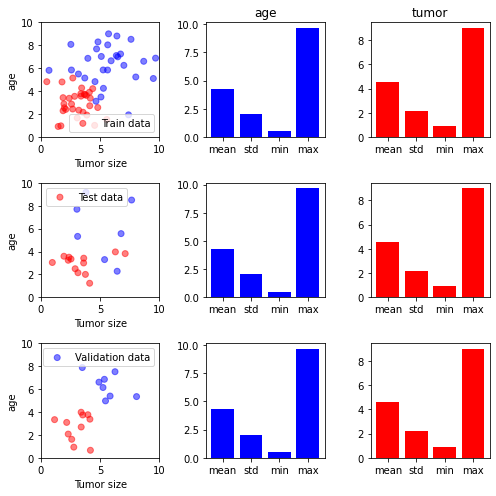

In [72]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(331)

train_colors = ['b' if label == 0 else 'r' for label in train_y]
ax.scatter(train_x[:, 0], train_x[:,1], label = 'Train data', alpha = 0.5,
           marker = 'o', c= train_colors)
ax.set_xlabel('Tumor size')
ax.set_ylabel('age')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend()

ax = fig.add_subplot(332)
ax.bar(list(train_x_0_summaries.keys()),
       list(train_x_0_summaries.values()), align='center', color='b')
ax.set_title('age')

ax = fig.add_subplot(333)
ax.bar(list(train_x_1_summaries.keys()),
       list(train_x_1_summaries.values()), align='center', color='r')

ax.set_title('tumor')


ax = fig.add_subplot(334)

test_colors = ['b' if label == 0 else 'r' for label in test_y]
ax.scatter(test_x[:, 0], test_x[:,1], label = 'Test data', alpha = 0.5,
           marker = 'o', c= test_colors)
ax.set_xlabel('Tumor size')
ax.set_ylabel('age')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend()

ax = fig.add_subplot(335)
ax.bar(list(train_x_0_summaries.keys()),
       list(train_x_0_summaries.values()), align='center', color='b')

ax = fig.add_subplot(336)
ax.bar(list(train_x_1_summaries.keys()),
       list(train_x_1_summaries.values()), align='center', color='r')

ax = fig.add_subplot(337)

val_colors = ['b' if label == 0 else 'r' for label in val_y]
ax.scatter(val_x[:, 0], val_x[:,1], label = 'Validation data', alpha = 0.5,
           marker = 'o', c= val_colors)
ax.set_xlabel('Tumor size')
ax.set_ylabel('age')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.legend()

ax = fig.add_subplot(338)
ax.bar(list(train_x_0_summaries.keys()),
       list(train_x_0_summaries.values()), align='center', color='b')

ax = fig.add_subplot(339)
ax.bar(list(train_x_1_summaries.keys()),
       list(train_x_1_summaries.values()), align='center', color='r')

plt.tight_layout()
plt.show()
